# Lineare Regression
## 3.1 Lineare Regression im Eindimensionalen Raum $f:R→R$
Bei der linearen Regression im Eindimensionalen nehmen wir an, dass die Funktion f beschrieben werden kann durch:

$ f (x) = w_1 x + w_0$

Wir nennen $w = (w , w )T ∈ R^2$ Parameter des Modells.

Dabei sind die Parameter $w_1$ die Steigungn und $w_0$ die Schnittstelle mit der Y-Achse.

### 3.1.1 Welche Gerade passt am besten in den Datenpunkten -> Bestimmung der Parameter 
Wir bestimmen den quadratischen Fehler (Residual Sum of Squares, RSS) der parametrisierten Funktion mit Hilfe der Formel:

$RSS(w) = \sum_{i=1}^{n}  (y^{(i)} − f_w(x^{(i)})^2$

Bei der RSS werden die Abstände quadriert und summiert.

### Beispiel

Wir untersuchen die Beziehung zwischen der Menge der in einer Kaffeebar verkauften Kaffees und dem Tagesumsatz. Die Daten sind jedoch durch Faktoren wie Wetter und Feiertage leicht gestört, so dass sie nicht perfekt linear sind.
Hier sind die fiktiven Datenpunkte:

- 50 Kaffees, Umsatz: 200 Euro
- 60 Kaffees, Umsatz: 240 Euro
- 70 Kaffees, Umsatz: 280 Euro
- 80 Kaffees, Umsatz: 260 Euro
- 90 Kaffees, Umsatz: 300 Euro
- 100 Kaffees, Umsatz: 320 Euro


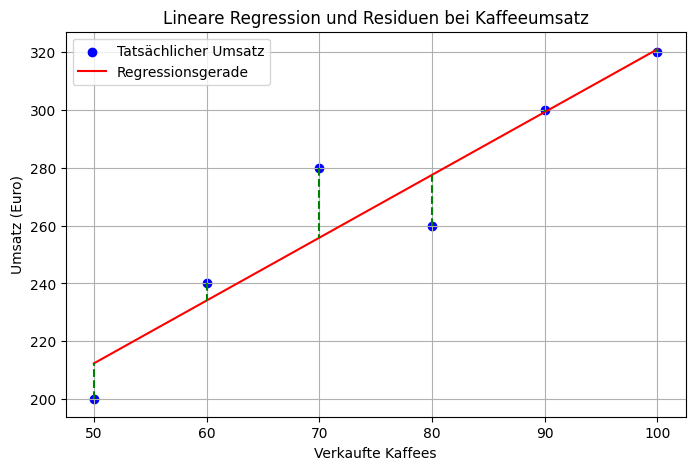

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Datenpunkte für Kaffees und Umsatz
kaffees = np.array([50, 60, 70, 80, 90, 100])
umsatz = np.array([200, 240, 280, 260, 300, 320])  # in Euro

# Lineare Regression anwenden
slope, intercept = np.polyfit(kaffees, umsatz, 1)
regression_line = slope * kaffees + intercept

# Plot erstellen
plt.figure(figsize=(8, 5))
plt.scatter(kaffees, umsatz, color='blue', label='Tatsächlicher Umsatz')
plt.plot(kaffees, regression_line, color='red', label='Regressionsgerade')

# Residuen darstellen
for i in range(len(kaffees)):
    plt.plot([kaffees[i], kaffees[i]], [umsatz[i], regression_line[i]], 'g--')

plt.title('Lineare Regression und Residuen bei Kaffeeumsatz')
plt.xlabel('Verkaufte Kaffees')
plt.ylabel('Umsatz (Euro)')
plt.legend()
plt.grid(True)
plt.show()


Die grünen gestrichelten Linien zeigen die Residuen, also die vertikalen Abstände zwischen den tatsächlichen Umsätzen und den durch die Regressionsgerade vorhergesagten Werten.

Die Anpassung der Regressionsgeraden erfolgt durch die Minimierung des RSS, was bedeutet, dass die Summe der Quadrate dieser Abstände so klein wie möglich gehalten wird. In diesem Beispiel sehen wir, dass die Gerade nicht alle Datenpunkte perfekt durchläuft, was üblich ist, besonders wenn die Daten natürlichen Schwankungen unterliegen oder andere unkontrollierte Variablen vorhanden sind.

### 3.1.2 Geraden aus zwei Datensetzen

Sollen Modelle mit unterschiedlicher Anzahl von Trainingsdatenpunkte verglichen werden, so verwendet man häufig eine normalisierte Variante der RSS, den mittleren quadratischen Fehler (Mean Squared Error, MSE) definiert als:

$MSE(w) = \frac{1}{2}RSS(w)$


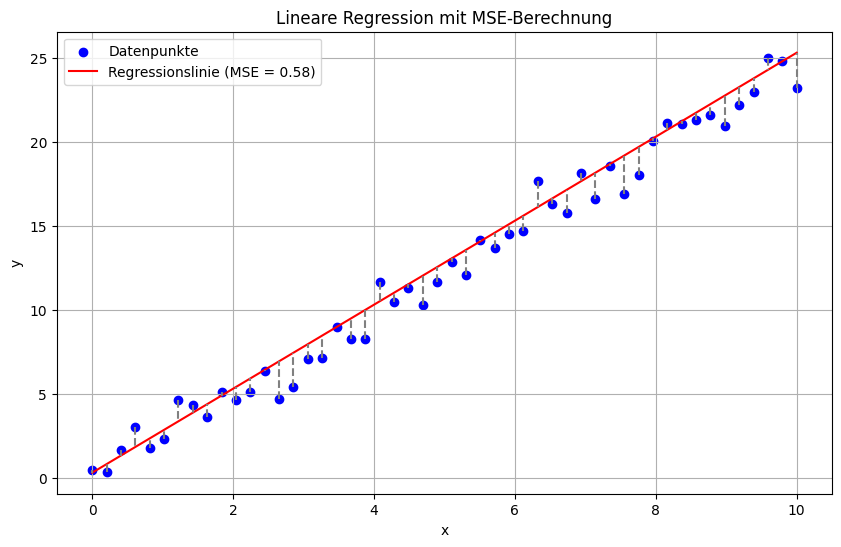

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generiere einige synthetische Datenpunkte
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 2.5 * x + np.random.normal(size=x.size)

# Füge den tatsächlichen Regressionsmodell hinzu
m = 2.5
b = np.random.normal()

# Berechne Vorhersagen
y_pred = m * x + b

# Berechne den mittleren quadratischen Fehler (MSE)
mse = np.mean((y - y_pred) ** 2) / 2

# Visualisiere die Daten und die Regressionslinie
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Datenpunkte')
plt.plot(x, y_pred, color='red', label=f'Regressionslinie (MSE = {mse:.2f})')

# Zeichne Linien zwischen den tatsächlichen Datenpunkten und den Vorhersagen
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], color='gray', linestyle='--')

plt.title('Lineare Regression mit MSE-Berechnung')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Die grauen gestrichelten Linien zeigen die Abstände zwischen den tatsächlichen Datenpunkten und den Vorhersagewerten auf der Regressionslinie. Diese Abstände sind die Residuen, also die Fehler in den Vorhersagen.


Der mittlere quadratische Fehler $(MSE)$ für dieses Modell beträgt etwa $\frac{1}{2}RSS$, was in diesem Fall etwa $MSE=0.94$ ist.

Dieser Wert gibt ein Maß dafür, wie gut die Regressionslinie die Datenpunkte repräsentiert: je kleiner der MSE, desto besser die Anpassung.

Im Folgenden jedoch wollen wir der Einfachheit halber den Fehler:

$E(w) = \frac{1}{2}\sum_{i=1}^{n}  (y^{(i)} − f_w(x^{(i)})^2$

zu minimieren, um die beste Funktion $f_w$ zu finden.

Das Minimum einer Funktion finden wir normalerweise durch:
1. Ableiten der Funktion
2. Setzen der Ableitung auf Null
3. Lösen des entstandenen Gleichungssystems
4. Untersuchung der gefundenen Lösungen (Hochpunkt, Tiefpunkt, Sattelpunkt, etc.)

Wir Erhalten nach diesem Prozess:  $(\frac{∂E(w)}{∂w_0},\frac{∂E(w)}{∂w_0}) = 0$

also ein lineares Gleichungssystem mit zwei Gleichungen und zwei Unbekannten $(w_0 , w_1 )$, welches prinzipiell eindeutig lösbar ist. Im Bereich des maschinellen Lernens kann es uns jedoch schnell passieren, dass die entstehenden Gleichungssysteme sehr groÿ oder nicht eindeutig lösbar werden. Daher werden meist iterative Verfahren, wie das Gradientenabstiegsverfahren verwendet.

### 3.1.3 Gradientenabstiegsverfahren
Das Gradientenabstiegsverfahren ist eine Ausprägung von
Liniensuchverfahren, bei denen eine Funktion $f : R^d → R$ entlang
eines Richtungsvektors (in diesem Fall dem Gradienten) optimiert
wird. Der Hyperparameter $η ∈ R_{>0}$ im Gradientenabstiegsverfahren
wird auch Lernrate genannt. Er hat direkten Einfluss auf die Geschwindigkeit, in der sich das Verfahren dem Minimum / der Konvergenz nähert. Üblicherweise beobachtet man den zu minimierenden Fehler $E(w)$ während der Laufzeit, um die Anzahl der Iterationen zu bestimmen.

Ist die Lernrate η zu groß, kann es zu Oszillationen kommen und das Verfahren konvergiert nicht.

### Beispiel
Das Gradientenabstiegsverfahren (Gradient Descent) ist eine Optimierungstechnik, die verwendet wird, um das Minimum einer Funktion zu finden. In der maschinellen Lerntheorie ist es besonders nützlich, um die Kostenfunktion zu minimieren, welche die Diskrepanz zwischen den Modellvorhersagen und den tatsächlichen Daten misst. Im Fall von linearen Regressionsmodellen ist die Kostenfunktion oft die Summe der quadratischen Fehler (SSE) oder der mittlere quadratische Fehler (MSE).

#### Wozu dient das Gradientenabstiegsverfahren?
Minimierung der Kostenfunktion: Der Gradientenabstieg wird verwendet, um die Parameter eines Modells (z.B. die Gewichte in der linearen Regression) so anzupassen, dass die Kostenfunktion minimiert wird. Dies führt zu einem Modell, das die Trainingsdaten bestmöglich abbildet.
Anpassung von Modellparametern: Durch iterative Anpassung der Modellparameter in die entgegengesetzte Richtung des Gradienten der Kostenfunktion (daher der Name "Abstieg") können präzisere Vorhersagen erreicht werden.
#### Funktionsweise des Gradientenabstiegs
Beim Gradientenabstieg wird der Gradient der Kostenfunktion bezüglich der Modellparameter (z.B. Steigung und y-Achsenabschnitt in der linearen Regression) berechnet. Der Gradient gibt die Richtung des steilsten Anstiegs der Funktion an. Um das Minimum zu finden, bewegt man sich in die entgegengesetzte Richtung des Gradienten:

$θ_{neu} = θ_{alt} - α $

#### Lineare Regression mit Gradientenabstieg
Wir erstellen nun ein einfaches Beispiel, um das Gradientenabstiegsverfahren in der linearen Regression zu demonstrieren. Dabei verwenden wir synthetische Daten, führen den Gradientenabstieg durch und visualisieren die schrittweise Anpassung der Regressionslinie.